# 0.0. Imports

In [108]:
import seaborn as sns
import pandas  as pd
import numpy   as np
import math

from datetime import datetime
from matplotlib import pyplot as plt

## 0.1. Helper Functions

In [109]:
# adjust plot size
sns.set(rc = {'figure.figsize':(15,8)})

# create classes based on km traveled
def create_km_class(km_driven):
    # create a category to every 5 k Km traveled
    return math.ceil(km_driven / 5000)

# organize manufacturers
def create_sorted_companies_tuple(dataframe):
    companies = dataframe['company_name'].to_list()
    companies_aux = [company.split(' ') for company in companies]
    companies_aux.sort(key=len, reverse=True)
    sorted_companies = [' '.join(company) for company in companies_aux]
    
    return tuple(sorted_companies)

# verify which manufacturer produced the motorcycle from our database
def create_company_name(companies, data):
    for company in companies:
        if company in data['name']:
            return company

## 0.2. Loading Data

In [110]:
df_raw = pd.read_csv('../data/raw/bikes.csv')
df_raw.shape

(1061, 7)

# 1.0. Data Description

In [111]:
df1 = df_raw.copy()

## 1.1. Data Dimension

In [112]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 1061
Number of columns: 7


## 1.2. Data Type

In [113]:
df1.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

## 1.3. NA Check

In [114]:
df1.isna().sum()/len(df1)

name                 0.000000
selling_price        0.000000
year                 0.000000
seller_type          0.000000
owner                0.000000
km_driven            0.000000
ex_showroom_price    0.409991
dtype: float64

# 2.0. Feature Engineering

In [115]:
df2 = df1.copy()
df2.shape

(1061, 7)

In [116]:
df2.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


## 2.1. Create `id` Feature

In [117]:
df2 = df2.reset_index()
df2 = df2.rename(columns={'index': 'id'})
df2.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


## 2.2. Adjust `selling_price` to float

In [118]:
df2['selling_price'] = df2['selling_price'].astype(float)
df2.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN


## 2.3. Create `age` Feature

In [119]:
df2['age'] = df2['year'].apply(lambda year: datetime.now().year - year)
df2.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12


## 2.4. Create `km_class` Feature

In [120]:
df2['km_class'] = df2['km_driven'].apply(lambda km_driven: create_km_class(km_driven))
df2.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5


## 2.5. Create `km_per_year` Feature

In [121]:
df2['km_per_year'] = df2.apply(lambda line: round(line['km_driven'] / line['age'], 3), axis=1)
df2.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.500
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2,941.667
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3,2400.000
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5,2875.000
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5,1750.000


## 2.6. Create `km_per_month` Feature

In [122]:
df2['km_per_month'] = df2.apply(lambda line: round(line['km_per_year'] / 12, 3), axis = 1)
df2.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.500,7.292
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2,941.667,78.472
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3,2400.000,200.000
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5,2875.000,239.583
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5,1750.000,145.833


## 2.7. Create `company` Feature

In [123]:
companies = pd.read_csv('../data/raw/companies.csv', index_col=0)

companies_tuple = create_sorted_companies_tuple(companies)

df2['company'] = df2.apply(lambda line: create_company_name(companies_tuple, line), axis=1)

df2.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.500,7.292,Royal Enfield
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2,941.667,78.472,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3,2400.000,200.000,Royal Enfield
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5,2875.000,239.583,Yamaha
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5,1750.000,145.833,Yamaha


## 2.8. Features Summary

| Feature | Description |
| :----- | --------: |
| ID | Identification |
| name | Motorcycle manufacturer and model |
| selling_price | Selling price |
| year | Motorcycle year of manufacture |
| seller_type | Individual, personal, seller or reseller |
| owner | If the motorcyle had one, two, three of four owners |
| km_driven | Number of kilometers driven on the motorcycle |
| ex_showroom_price | Motorcycle price without insurance and registration fees |
| age | Number of years the motorcycle has been in use |
| km_class | Classification of motorcycles according to mileage driven |
| km_per_year | Kilometers driven each year |
| km_per_month | Kilometers driven per month |
| company | Motorcycle manufacturer |

# 3.0. Rounds of Questions

In [124]:
df = df2.copy()
df.shape

(1061, 13)

## 3.1. First Round of Questions

#### 1. How many motorcycles do we have in the database?


In [125]:
print(f'The amount of motorcycles registered in this database is {df.shape[0]} motorcycles')

The amount of motorcycles registered in this database is 1061 motorcycles


#### 2. What is the year of the oldest motorcycle in the database?

In [126]:
older_bike = df[df['year'] == df['year'].min()]
print(f'The oldest motorcycle in this database was manufactured in {older_bike.iloc[0,3]}')

The oldest motorcycle in this database was manufactured in 1988


#### 3. What is the year of the newest motorcycle in the database?


In [127]:
newest = df[df['year'] == df['year'].max()]
print(f'The newest motorcycle in this database was manufactured in {newest.iloc[0, 3]}')


The newest motorcycle in this database was manufactured in 2020


#### 4. What is the value of the most expensive motorcycle in the database?

In [128]:
pricey = df[df['selling_price'] == df['selling_price'].max()]
print(f'The value of the most expensive motorcycle in the database is U$ {pricey.iloc[0, 2]:.2f}')


The value of the most expensive motorcycle in the database is U$ 760000.00


#### 5. What is the odometer value of the bike with the most mileage?

In [129]:
highest_km = df[df['km_driven'] == df['km_driven'].max()]
print(f'The odometer of the motorcycle with the highest mileage reads {highest_km.iloc[0, 6]} Km')

The odometer of the motorcycle with the highest mileage reads 880000 Km


#### 6. What is the odometer value of the bike with the lowest mileage?

In [130]:
lesser_km = df[df['km_driven'] == df['km_driven'].min()]
print(f'The odometer of the motorcycle with the lesser mileage reads {lesser_km.iloc[0, 6]} Km')

The odometer of the motorcycle with the lesser mileage reads 350 Km


#### 7. According to our database, from all of the motorcycles being displayed in a Show Room, which one is the most expensive?

In [131]:
ex_most_expensive = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]
print(f'The most expensive motorcycle displayed inside a showroom costs U$ {ex_most_expensive.iloc[0, 7]:.2f}')

The most expensive motorcycle displayed inside a showroom costs U$ 1278000.00


#### 8. According to our database, from all of the motorcycles being displayed in a Show Room, which one is the less expensive?

In [132]:
ex_less_expensive = df[df['ex_showroom_price'] == df['ex_showroom_price'].min()]
print(f'The less expensive motorcycle displayed in a showroom costs U$ {ex_less_expensive.iloc[0, 7]:.2f}')

The less expensive motorcycle displayed in a showroom costs U$ 30490.00


#### 9. How many motorcycles are being sold by their owners and how many are being sold by resellers?

In [133]:
df_grouped = df[['id', 'seller_type']].groupby('seller_type')
df_grouped = df_grouped.count().reset_index()
df_grouped = df_grouped.rename(columns={'id': 'count'})
df_grouped

,seller_type,count
0,Dealer,6
1,Individual,1055


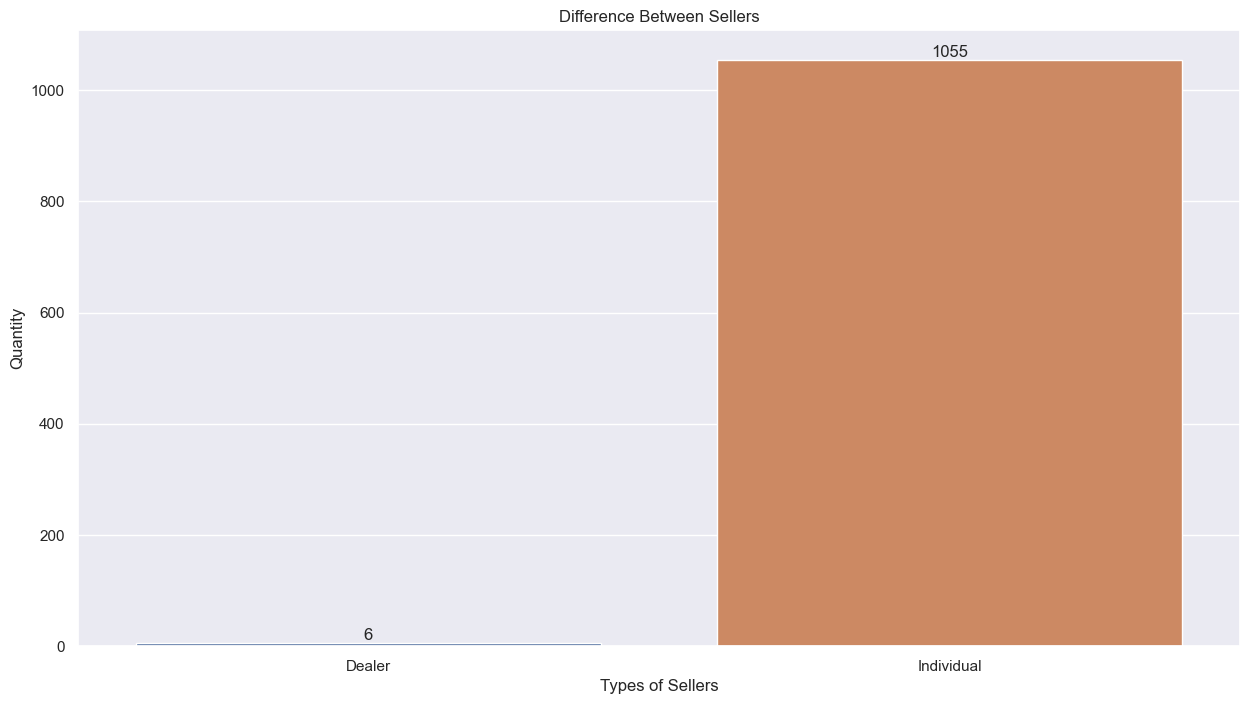

In [134]:
ax = sns.barplot(
    data = df_grouped,
    x = 'seller_type',
    y = 'count'
)

ax.bar_label(ax.containers[0])

ax.set(
    title = 'Difference Between Sellers',
    xlabel = 'Types of Sellers',
    ylabel = 'Quantity'
);

In [135]:
print(f'Only {df_grouped.loc[0, "count"]} motorcycles are being sold by resellers')
print(f'But a total of {df_grouped.loc[1, "count"]} motorcycles are being sold by their owners')

Only 6 motorcycles are being sold by resellers
But a total of 1055 motorcycles are being sold by their owners


#### 10. What is the average price of the motorcycles in the database?

In [136]:
mean = df['selling_price'].mean()
print(f'The average price of the motorcycles in the database is U$ {mean:.2f}')

The average price of the motorcycles in the database is U$ 59638.15


#### 11. What is the average year of the motorcycles in the database?

In [137]:
media_y = df['year'].mean()
print(f'The average year of the motorcycles in the database is {media_y:.0f}')

The average year of the motorcycles in the database is 2014


#### 12. What is the average mileage of the motorcycles in the database?

In [138]:
mean_km = df['km_driven'].mean()
print(f'The average kilometers ridden by the motorcycles in the database is {mean_km:.2f} Km')

The average kilometers ridden by the motorcycles in the database is 34359.83 Km


#### 13. How many motorcycles in the database had only one owner?

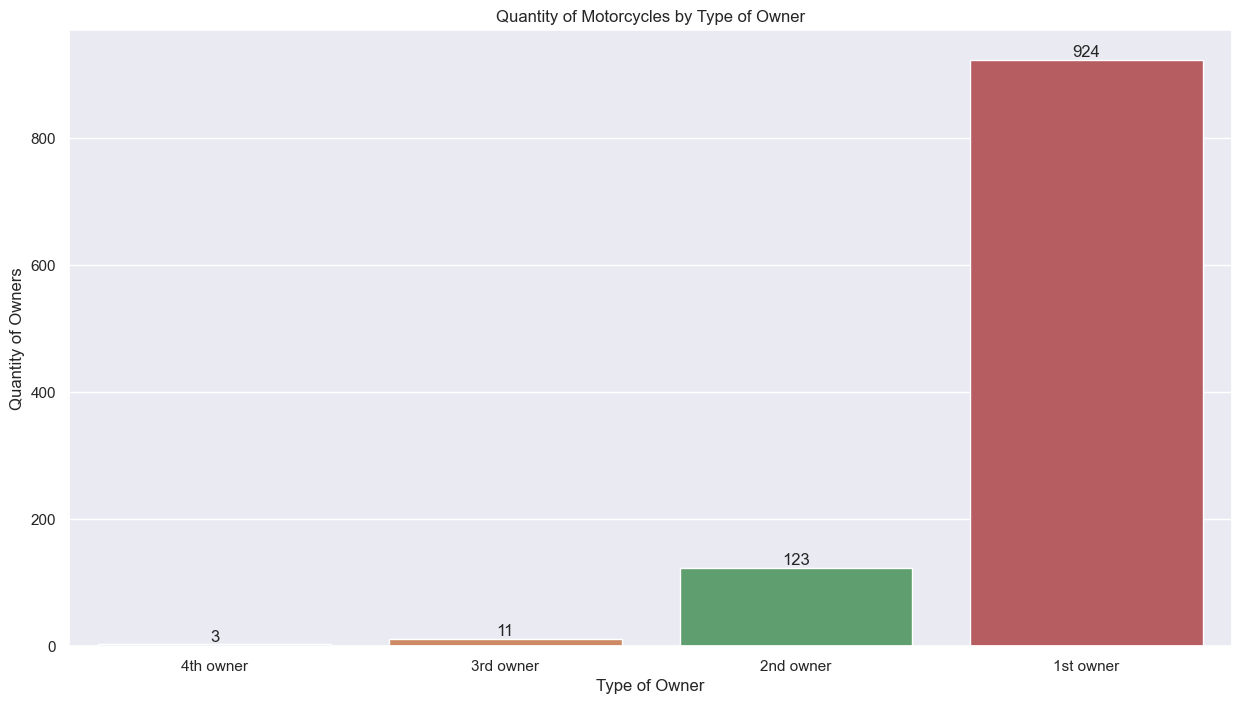

In [139]:
single_owner = df[df['owner'] == '1st owner'].shape[0]
df_grouped = df.groupby('owner').agg(qty = pd.NamedAgg('id', 'count')).sort_values('qty').reset_index()

ax = sns.barplot(data=df_grouped,
                x = 'owner',
                y = 'qty')

ax.bar_label(ax.containers[0])

ax.set(title = 'Quantity of Motorcycles by Type of Owner',
    xlabel = 'Type of Owner',
    ylabel = 'Quantity of Owners');

In [140]:
print(f'There are {single_owner} single-owner motorcycles in the database')

There are 924 single-owner motorcycles in the database


#### 14. Are the motorcycles with the highest mileage the cheapest motorcycles in the Dataset?

In [141]:
# classify motorcycles
df['km_class'] = df['km_driven'].apply(lambda km_driven: create_km_class(km_driven))

# quantity of classes in the database
len(df['km_class'].unique())

32

In [142]:
df_grouped = df[['km_class', 'selling_price']].groupby('km_class')
df_grouped = df_grouped.mean().sort_values('selling_price', ascending=False).reset_index()
df_grouped.head()

,km_class,selling_price
0,1,124564.705882
1,69,120000.000000
2,2,87146.448000
3,3,79736.842105
4,48,70000.000000


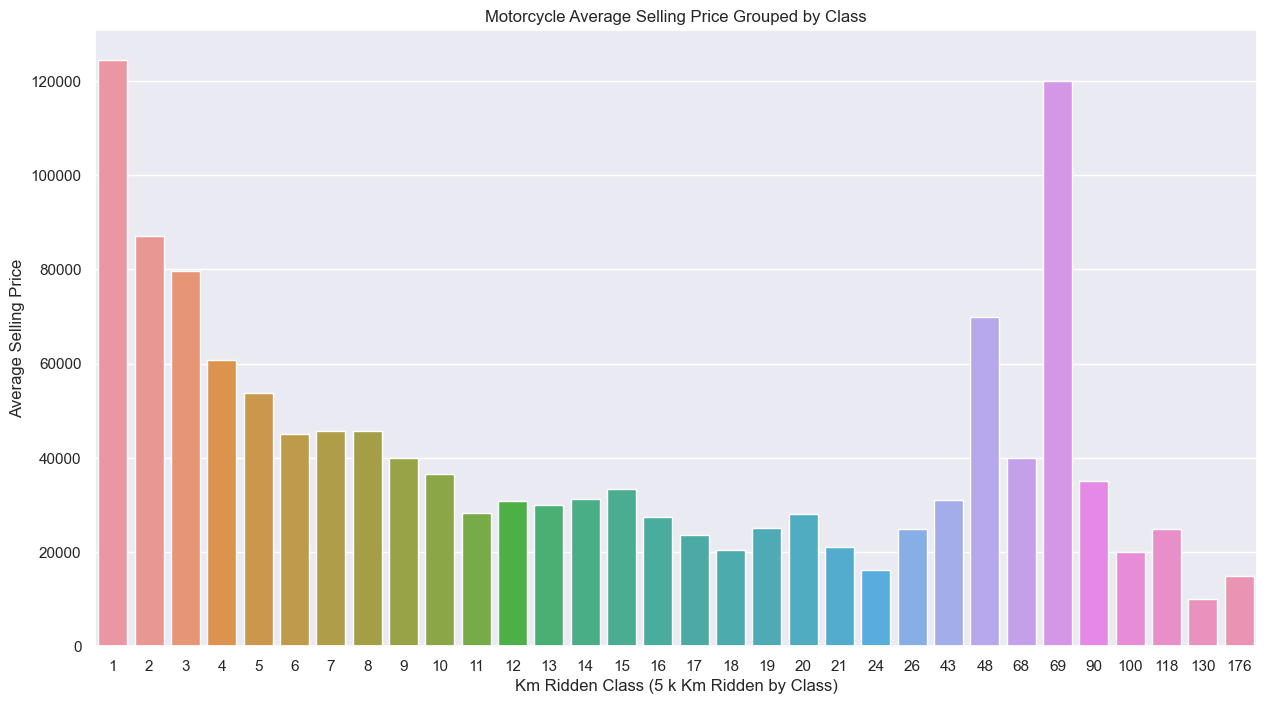

In [143]:
ax = sns.barplot(data = df_grouped,
                x = 'km_class',
                y = 'selling_price')

ax.set(title = 'Motorcycle Average Selling Price Grouped by Class',
    xlabel = 'Km Ridden Class (5 k Km Ridden by Class)',
    ylabel = 'Average Selling Price');

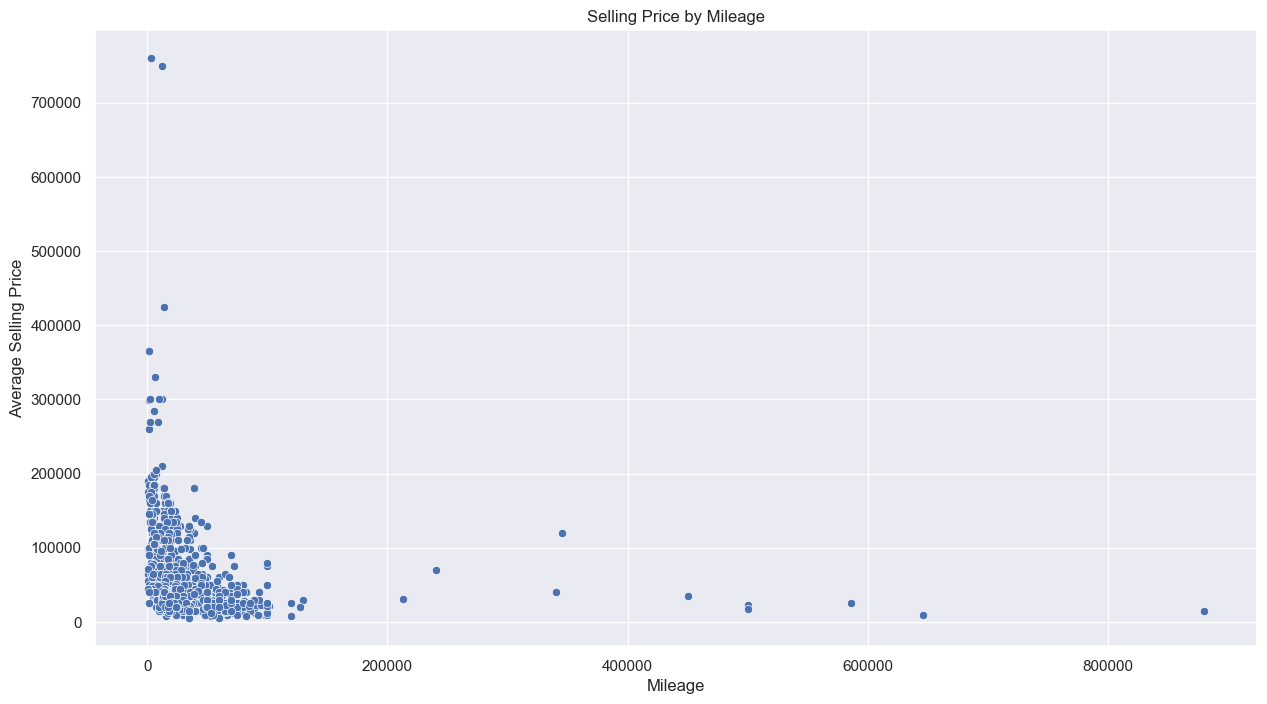

In [144]:
ax = sns.scatterplot(data = df1,
                    x = 'km_driven',
                    y = 'selling_price')

ax.set(title = 'Selling Price by Mileage',
    xlabel = 'Mileage',
    ylabel = 'Average Selling Price');

In [145]:
print(f'As we can see in both graphs, the motorcycles that have the most mileage are the cheapest.')

As we can see in both graphs, the motorcycles that have the most mileage are the cheapest.


## 3.2. Second Round of Questions

#### 1. Are motorcycles that only had 1 owner more expensive on average than motorcycles that have had more owners?

In [146]:
df_grouped = df.groupby('owner')
df_grouped = df_grouped.agg(avg_price = pd.NamedAgg('selling_price', 'mean'),
                            qty = pd.NamedAgg('owner', 'count')).sort_values('avg_price', ascending=False).reset_index()

df_grouped['avg_price'] = df_grouped['avg_price'].round(2)
df_grouped

,owner,avg_price,qty
0,4th owner,118333.33,3
1,1st owner,60022.81,924
2,3rd owner,55727.27,11
3,2nd owner,55666.66,123


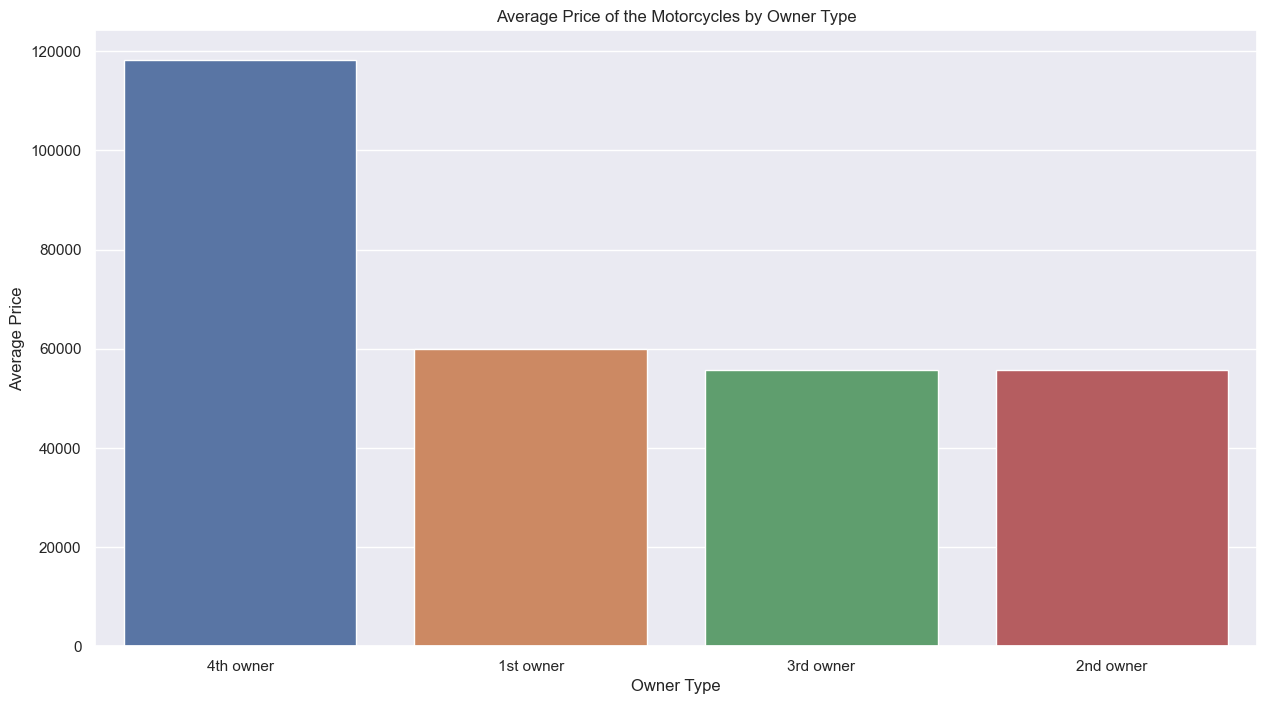

In [147]:
ax = sns.barplot(data = df_grouped,
                x = 'owner',
                y = 'avg_price')

ax.set(title = 'Average Price of the Motorcycles by Owner Type',
    xlabel = 'Owner Type',
    ylabel = 'Average Price');

As we can see, on average, the most expensive bikes are the bikes that have had 4 owners.

#### 2. Are the motorcycles that have had more owners the motorcycles, the ones that have higher average mileage, more than the bikes that have had fewer owners?

In [148]:
df_grouped = df[['owner', 'km_driven']].groupby('owner')
df_grouped = df_grouped.mean().sort_values('km_driven', ascending=False).reset_index()
df_grouped

,owner,km_driven
0,4th owner,311500.000000
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,1st owner,32816.583333


On average the bikes that have had more owners are the bikes with the most mileage. Still this is a very discrepant figure (311500km), and most likely a typo in the figures, but we could only confirm that these figures are wrong with more information or better data.

#### 3. Are the bikes that have had more owners, the oldest bikes on the average?

In [149]:
df_grouped = df[['owner', 'age']].groupby('owner')
df_grouped = df_grouped.mean().sort_values('age', ascending=False).reset_index()
df_grouped['age'] = df_grouped['age'].astype(int)
df_grouped

,owner,age
0,4th owner,15
1,3rd owner,15
2,2nd owner,10
3,1st owner,8


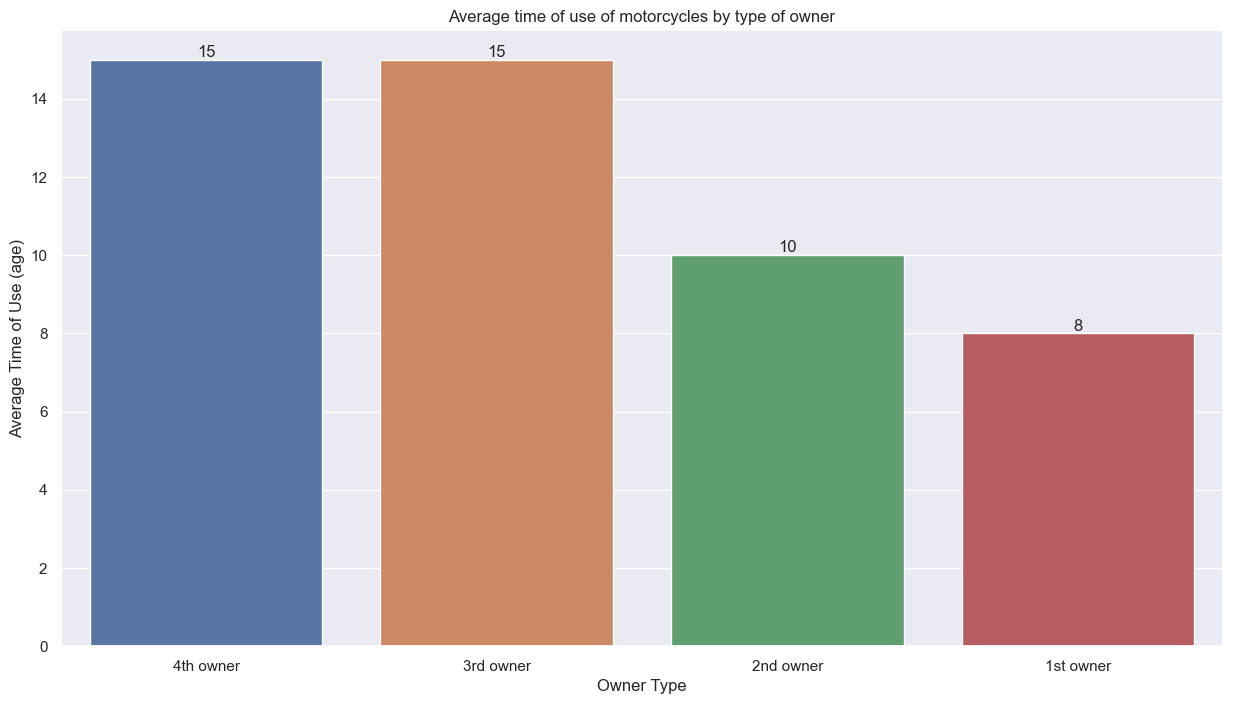

In [150]:
ax = sns.barplot(data = df_grouped,
    x = 'owner',
    y = 'age')

ax.bar_label(ax.containers[0])

ax.set(title = 'Average time of use of motorcycles by type of owner',
    xlabel = 'Owner Type',
    ylabel = 'Average Time of Use (age)');

As we can see, the bikes that have had the most owners are indeed the bikes with the highest average age within the database.

#### 4. Are motorcycles that are sold by dealers, most expensive motorcycles on average? More than motorcycles sold by their owners?

In [151]:
df_grouped = df[['seller_type', 'selling_price']].groupby('seller_type')
df_grouped = df_grouped.agg(avg_price = pd.NamedAgg('selling_price', 'mean'),
                            median_price = pd.NamedAgg('selling_price', 'median'),
                            std_price = pd.NamedAgg('selling_price', 'std'),
                            qty = pd.NamedAgg('seller_type', 'count')).sort_values('avg_price', ascending=False).reset_index()
df_grouped

,seller_type,avg_price,median_price,std_price,qty
0,Individual,59711.923223,45000.0,56427.961672,1055
1,Dealer,46666.666667,44000.0,25734.542286,6


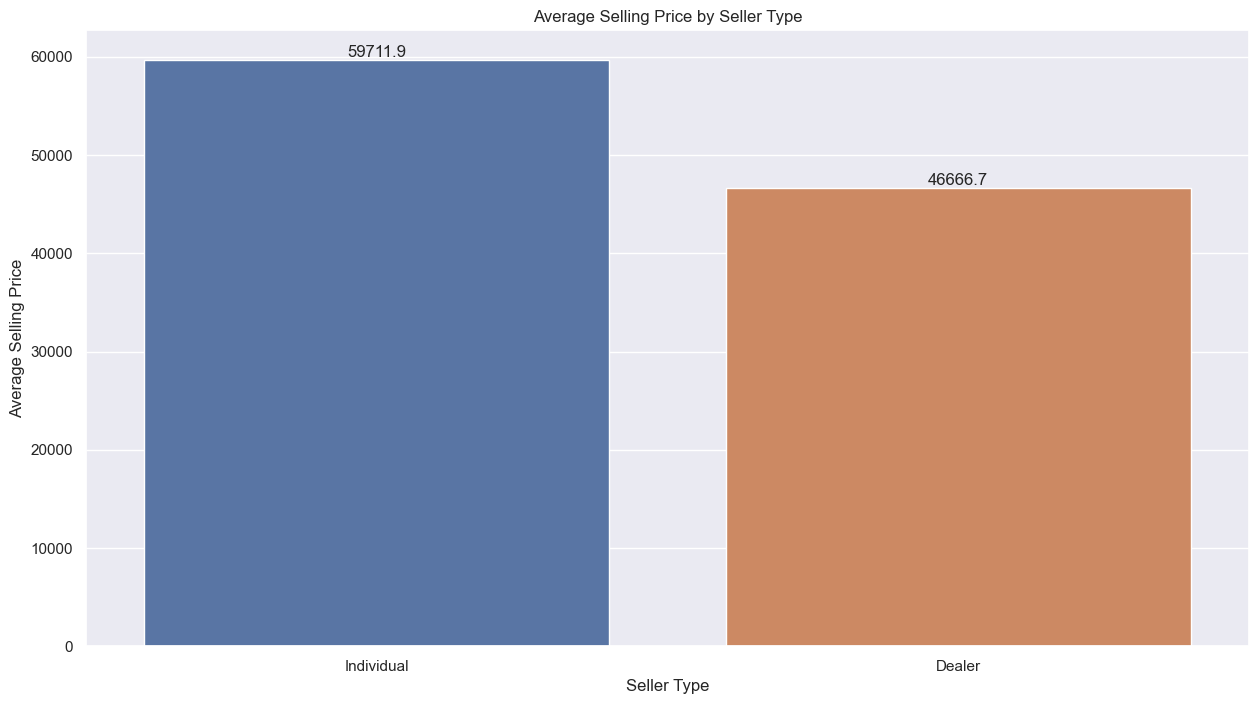

In [152]:
ax = sns.barplot(data = df_grouped,
                x = 'seller_type',
                y = 'avg_price')

ax.bar_label(ax.containers[0])

ax.set(title = 'Average Selling Price by Seller Type',
    xlabel = 'Seller Type',
    ylabel = 'Average Selling Price');

As we can see, the motorcycles that are sold by their previous owners are the most expensive on average.

#### 5. Of the manufacturers, which has the largest number of motorcycles registered in the database?

In [153]:
df_grouped = df.loc[:, ['company', 'id']].groupby('company')
df_grouped = df_grouped.count().sort_values('id', ascending=False).reset_index()
df_grouped

,company,id
0,Bajaj,260
1,Honda,204
2,Hero,144
3,Royal Enfield,109
4,Yamaha,102
5,Hero Honda,88
6,TVS,69
7,Suzuki,30
8,KTM,24
9,Mahindra,6


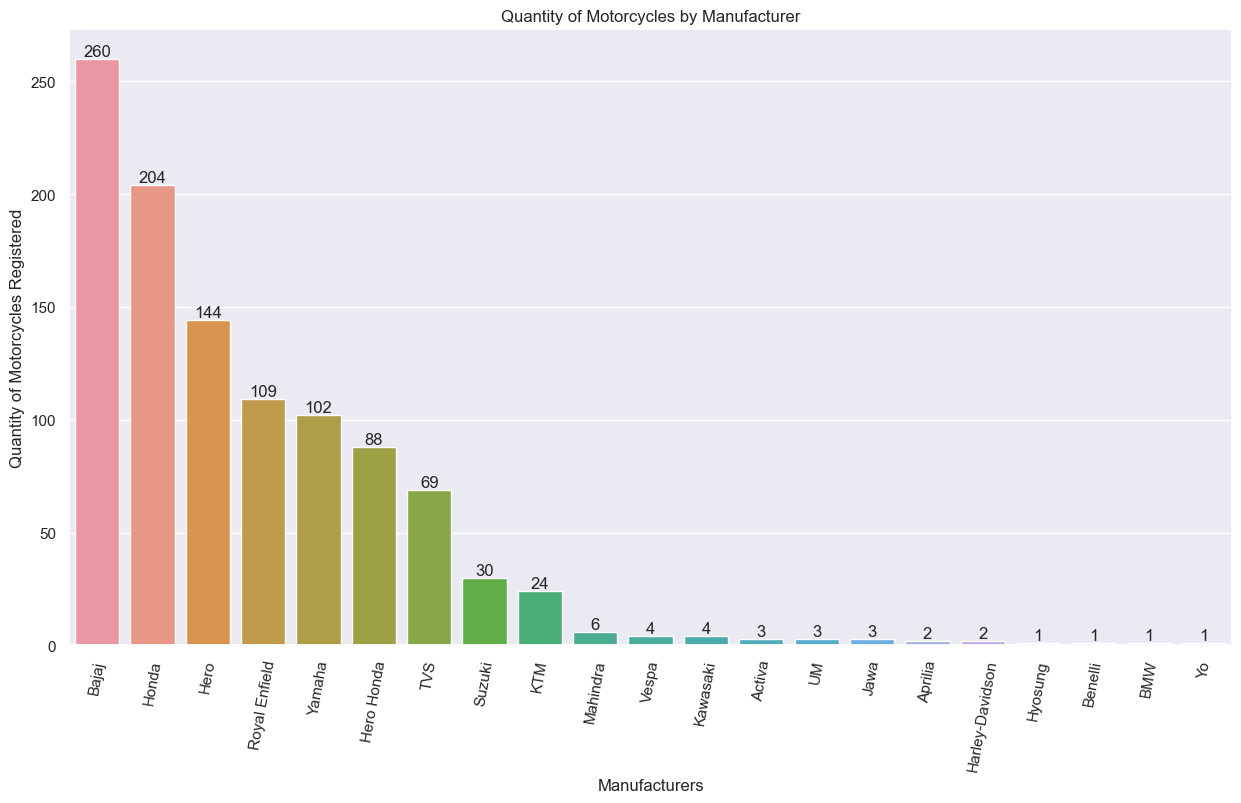

In [154]:
ax = sns.barplot(data = df_grouped,
                x = 'company',
                y = 'id')
ax.bar_label(ax.containers[0])

ax.set(title = 'Quantity of Motorcycles by Manufacturer',
    xlabel = 'Manufacturers',
    ylabel = 'Quantity of Motorcycles Registered')

plt.xticks(rotation = 80);

As we can observe, the manufacturer that has the most motorcycles registered in the database is Bajaj.

## 3.3. Third Round of Questions

#### 1. Adjust the feature `name` so that it only has the name of the motorcycle.

In [155]:
df['name'] = df.apply(lambda line: line['name'].replace(f"{line['company']} ", ''), axis=1)
df.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
0,0,Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.500,7.292,Royal Enfield
1,1,Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2,941.667,78.472,Honda
2,2,Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3,2400.000,200.000,Royal Enfield
3,3,Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5,2875.000,239.583,Yamaha
4,4,SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5,1750.000,145.833,Yamaha


#### 2. Which of the manufacturers has the highest average price of their motorcycles?

In [156]:
df_grouped = df[['company', 'selling_price']].groupby('company')
df_grouped = df_grouped.agg(avg_price = pd.NamedAgg('selling_price', 'mean'),
                            median_price = pd.NamedAgg('selling_price', 'median'),
                            std_price = pd.NamedAgg('selling_price', 'std'),
                            qty = pd.NamedAgg('company', 'count')).sort_values('avg_price', ascending=False).reset_index()

df_grouped

,company,avg_price,median_price,std_price,qty
0,Harley-Davidson,540000.000000,540000.0,296984.848098,2
1,BMW,300000.000000,300000.0,NaN,1
2,Kawasaki,287500.000000,300000.0,123322.071558,4
3,Jawa,175000.000000,180000.0,13228.756555,3
4,Benelli,160000.000000,160000.0,NaN,1
5,UM,156666.666667,160000.0,15275.252317,3
6,KTM,155708.333333,142500.0,41560.306279,24
7,Hyosung,135000.000000,135000.0,NaN,1
8,Royal Enfield,128549.541284,123000.0,42971.124292,109
9,Suzuki,73800.000000,45000.0,131871.515316,30


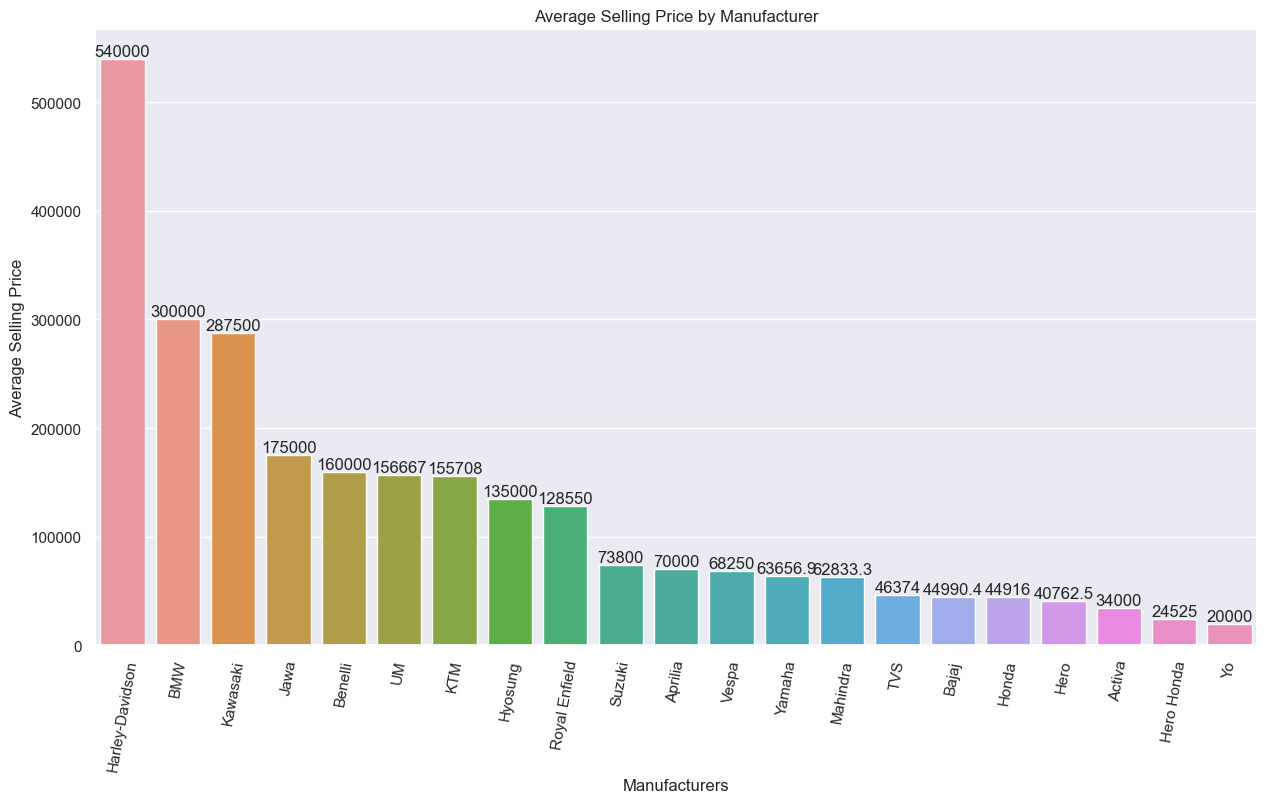

In [157]:
ax = sns.barplot(data = df_grouped,
                x = 'company',
                y = 'avg_price')

ax.bar_label(ax.containers[0])

ax.set(title = 'Average Selling Price by Manufacturer',
    xlabel = 'Manufacturers',
    ylabel = 'Average Selling Price')

plt.xticks(rotation = 80);

As we can notice, the manufacturer that has the motorcycles with the highest average sales value is Harley-Davidson.

#### 3. Which manufacturer has the bike with the most mileage?

In [158]:
df_grouped = df[['company', 'km_driven']].groupby('company')

df_grouped = df_grouped.agg(avg_km_driven = pd.NamedAgg('km_driven', 'mean'),
                            median_km_driven = pd.NamedAgg('km_driven', 'median'),
                            std_km_driven = pd.NamedAgg('km_driven', 'std'),
                            qty = pd.NamedAgg('company', 'count')).sort_values('avg_km_driven', ascending=False).reset_index()
df_grouped

,company,avg_km_driven,median_km_driven,std_km_driven,qty
0,Activa,167266.666667,1300.0,288155.796980,3
1,Hero Honda,60947.511364,49937.5,74767.910682,88
2,TVS,42008.318841,22000.0,104785.464235,69
3,Honda,36745.235294,25000.0,58314.203203,204
4,Hero,34172.187500,26000.0,41079.224626,144
5,Bajaj,33786.126923,30000.0,21387.191339,260
6,Yamaha,28281.862745,23000.0,23003.670574,102
7,Suzuki,22194.600000,15000.0,24011.389373,30
8,Royal Enfield,20732.935780,15000.0,34131.866124,109
9,Vespa,18428.000000,11356.0,22445.997074,4


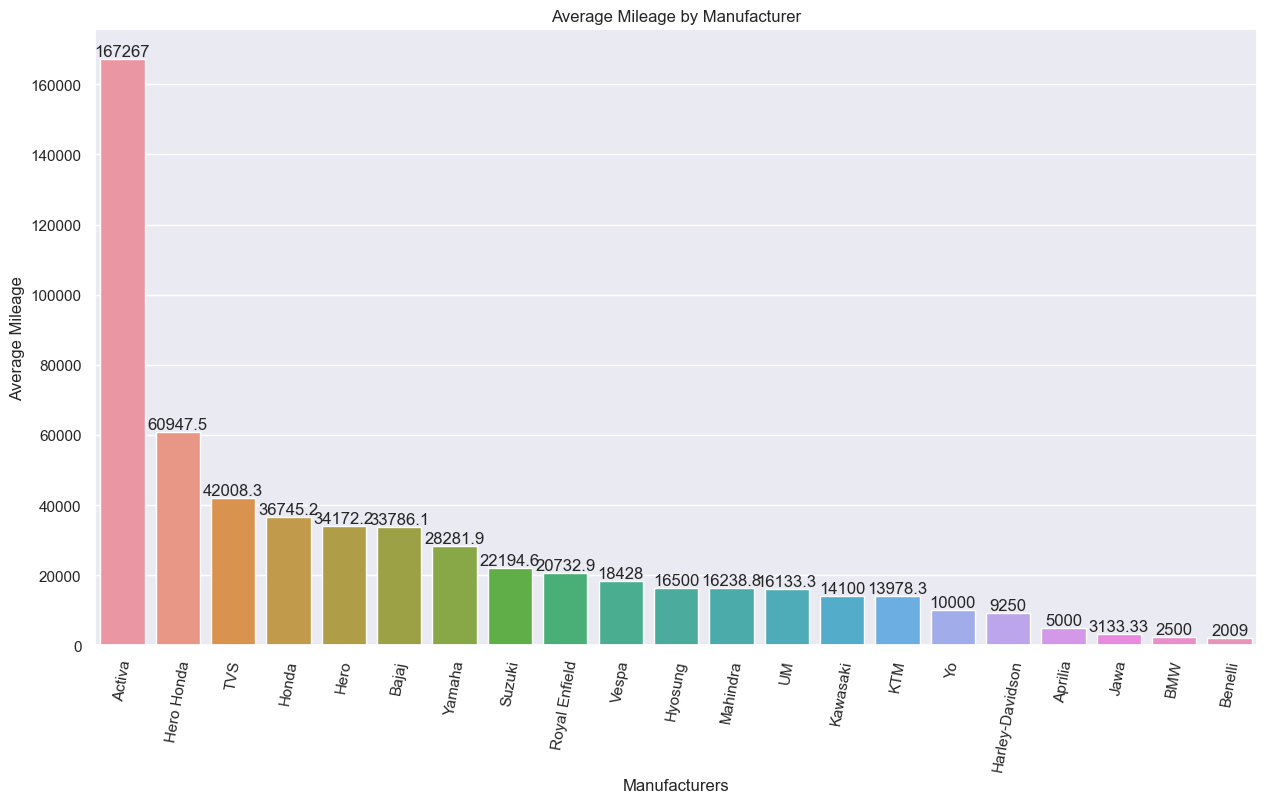

In [159]:
ax = sns.barplot(data = df_grouped,
                x = 'company',
                y = 'avg_km_driven')

ax.bar_label(ax.containers[0])

ax.set(title = 'Average Mileage by Manufacturer',
    xlabel = 'Manufacturers',
    ylabel = 'Average Mileage')

plt.xticks(rotation = 80);

As we can observe, the manufacturer Activia has the motorcycle with the longest distance traveled in the database.

#### 4. Which manufacturer has the oldest motorcycle?

In [160]:
df_grouped = df[['year', 'company']].groupby('company')
df_grouped = df_grouped.min().sort_values('year', ascending=False).reset_index()

df_grouped

,company,year
0,Jawa,2019
1,BMW,2018
2,Aprilia,2018
3,Benelli,2017
4,UM,2017
5,Hyosung,2016
6,Vespa,2013
7,Harley-Davidson,2013
8,KTM,2013
9,Yo,2011


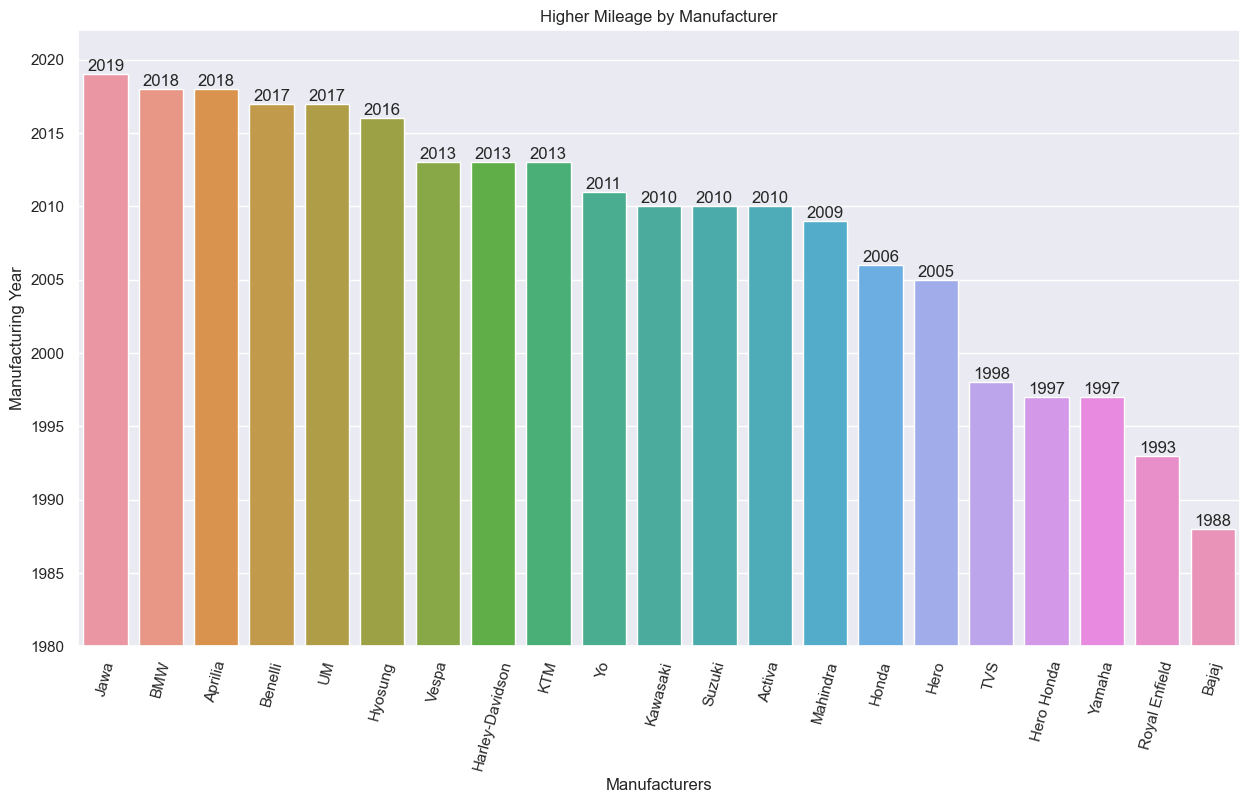

In [161]:
ax = sns.barplot(data=df_grouped,
                x='company', 
                y='year')

ax.bar_label(ax.containers[0])

ax.set(xlabel = 'Manufacturers', 
    ylabel = 'Manufacturing Year', 
    title = 'Higher Mileage by Manufacturer', 
    ylim = [1980, 2022])

plt.xticks(rotation=75);

As pointed out in the graph, the manufacturer that has the oldest motorcycle in the database is the Bajaj manufacturer.

#### 5. Is the manufacturer that has the most expensive bike in the Dataset, also the manufacturer that has the fewest registered bikes?

In [162]:
df_grouped = df[['id', 'selling_price', 'company']].groupby('company')

df_grouped = df_grouped.agg(max_selling_price = pd.NamedAgg('selling_price', 'max'),
                            quantity = pd.NamedAgg('id', 'count'))

df_grouped = df_grouped.reset_index().sort_values('max_selling_price', ascending=False)
df_grouped.head()

,company,max_selling_price,quantity
15,Suzuki,760000.0,30
5,Harley-Davidson,750000.0,2
12,Kawasaki,425000.0,4
19,Yamaha,365000.0,102
2,BMW,300000.0,1


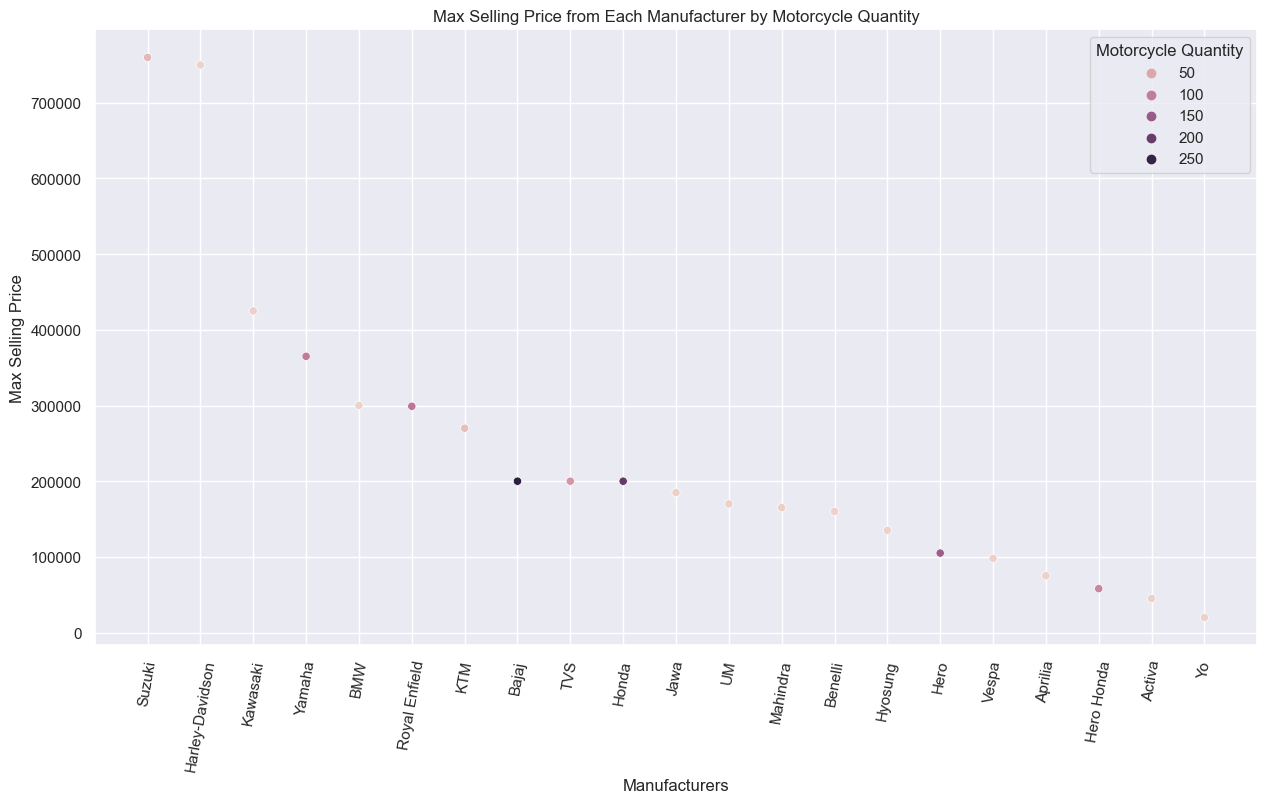

In [163]:
ax = sns.scatterplot(data = df_grouped,
                    x = 'company', 
                    y = 'max_selling_price', 
                    hue='quantity')

ax = ax.set(title = 'Max Selling Price from Each Manufacturer by Motorcycle Quantity', 
            xlabel='Manufacturers', 
            ylabel='Max Selling Price')

plt.xticks(rotation = 80)
plt.legend(title = 'Motorcycle Quantity', loc='upper right');

The manufacturer that has the most expensive bike in the database is not the manufacturer that has the least amount of bikes.

#### 6. Which manufacturer has the smallest variation in sales value?

In [164]:
df_grouped = df[['selling_price', 'company']].groupby('company')

df_grouped = df_grouped.agg(std = pd.NamedAgg('selling_price', 'std'),
                            mean = pd.NamedAgg('selling_price', 'mean'))

df_grouped = df_grouped.reset_index().sort_values('std').dropna()
df_grouped.head()

,company,std,mean
1,Aprilia,7071.067812,70000.000000
7,Hero Honda,11006.019774,24525.000000
10,Jawa,13228.756555,175000.000000
0,Activa,14933.184523,34000.000000
17,UM,15275.252317,156666.666667


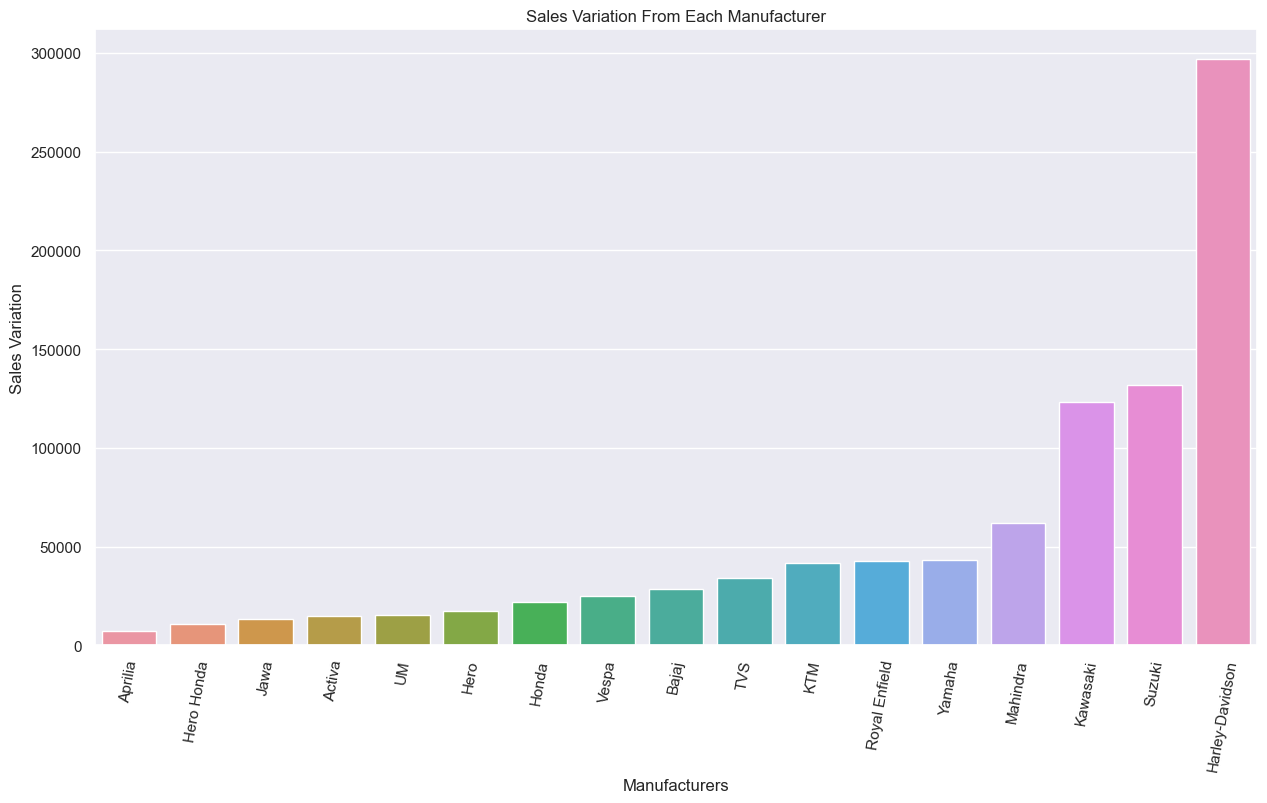

In [165]:
ax = sns.barplot(data = df_grouped,
                x = 'company', 
                y = 'std')

ax = ax.set(title='Sales Variation From Each Manufacturer',
            xlabel='Manufacturers',
            ylabel='Sales Variation')

plt.xticks(rotation = 80);

#### 7. Which Motorcycles should be acquired?

- Take into account that we want bikes with a maximum of 3 years of use; 
- A maximum of 40,000 kilometers of mileage; 
- That are from one owner only;
- That are being sold by individuals (not reseller), and that have an intended sale value lower than the showroom value. 

In [172]:
year = (df['year'] >= 2018)
mileage = (df['km_driven'] <= 40000)
owners = (df['owner'] == '1st owner')
sellers = (df['seller_type'] == 'Individual')
selling_price = (df['selling_price'] < df1['ex_showroom_price'])

In [174]:
df_selected = df.loc[year & 
                    mileage & 
                    owners & 
                    sellers & 
                    selling_price, 
                    columns].sort_values('selling_price', ascending = False)

df_selected.head()

,id,name,selling_price,km_driven,year
344,344,G310GS,300000.0,2500,2018
588,588,CBR-250R,200000.0,5500,2019
865,865,Thunderbird 500X,185000.0,1500,2018
960,960,Thunder 500,175000.0,3000,2018
961,961,Renegade Mojave,170000.0,1400,2019


In [176]:
df_selected.to_excel('../data/exported/bikes_selected.xlsx', index = False)